In [117]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None 

In [118]:
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?,Twitter (data science influencers)?
66,66,China,Data Analyst,< 1 years,Python,A laptop,Never,< 1 year,I do not know,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"PyCharm , Spyder",None,None,Other,Other,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,India,Data Analyst,< 1 years,Python,A laptop,Once,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN
108,108,Israel,Data Analyst,< 1 years,Python,A personal computer / desktop,Never,I do not use machine learning methods,We use ML methods for generating insights (but...,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL","Jupyter Notebook, Other",None,"Matplotlib ,Seaborn",NaN,NaN,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN


### Q9 - analizamos los entornos de desarrollo integrados que utiliza nuestra persona

In [119]:
df_q9=df['q9'].reset_index()
df_q9

,index,q9
0,32,RStudio
1,46,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
2,66,"PyCharm , Spyder"
3,102,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
4,108,"Jupyter Notebook, Other"
...,...,...
746,25811,"PyCharm , Vim / Emacs,Jupyter Notebook"
747,25819,Visual Studio
748,25909,Jupyter Notebook
749,25916,Jupyter Notebook


In [120]:
#def quitar_comillas_2 (col):
        #try:
        #    return col.split(',')
        #except:
        #    np.nan

In [121]:
df_q9['q9'] = df_q9['q9']
df_9_explode = df_q9['q9'].explode().reset_index()
gb9 = df_9_explode.groupby('q9').size()
df_q9 = gb9.reset_index(name='count')
df_q9.drop(0, axis= 0,inplace=True)

In [122]:
df_q9['q9'][15]

'Jupyter (JupyterLab, Jupyter Notebooks, etc) , Notepad++'

In [123]:
patron = '\(.*\)'

In [124]:
df_q9['q9'].str.contains(patron)

1      False
2      False
3      False
4      False
5      False
       ...  
155     True
156     True
157     True
158     True
159     True
Name: q9, Length: 159, dtype: bool

In [125]:
df_q9['q9'][df_q9['q9'].str.contains(patron)]

14         Jupyter (JupyterLab, Jupyter Notebooks, etc) 
15     Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
16     Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
17     Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
18     Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
                             ...                        
155    Visual Studio Code (VSCode) ,PyCharm , Spyder,...
156    Visual Studio Code (VSCode) ,PyCharm , Sublime...
157    Visual Studio Code (VSCode) ,PyCharm , Sublime...
158    Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...
159    Visual Studio Code (VSCode) ,PyCharm ,MATLAB ,...
Name: q9, Length: 93, dtype: object

In [126]:
df_q9['q9'][df_q9['q9'].str.contains(patron)][15]

'Jupyter (JupyterLab, Jupyter Notebooks, etc) , Notepad++'

In [127]:
df_q9['q9'][df_q9['q9'].str.contains(patron)][15].split(')')

['Jupyter (JupyterLab, Jupyter Notebooks, etc', ' , Notepad++']

In [128]:
df_q9['q9'][df_q9['q9'].str.contains(patron)][15].split(')')[0].replace(',','/')

'Jupyter (JupyterLab/ Jupyter Notebooks/ etc'

In [159]:
for c in df_q9['q9']:
    if str(df_q9['q9'][df_q9['q9'].str.contains(patron)]) in c:
        for i in df_q9['q9'][df_q9['q9'].str.contains(patron)].split(')'):
            df_q9['q9'][df_q9['q9'].str.contains(patron)].split(')')[0] = [df_q9['q9'].str.contains(patron)].split(')')[0].replace(',','/')


In [160]:
df_q9['q9'][15]

'Jupyter (JupyterLab, Jupyter Notebooks, etc) , Notepad++'

In [129]:
df_q9['q9'][15]

'Jupyter (JupyterLab, Jupyter Notebooks, etc) , Notepad++'

In [161]:
df_q9['q9'][df_q9['q9'].str.contains(patron)][15].split(')')[1].lstrip(" ,")

'Notepad++'

In [162]:
df_q9['q9'][df_q9['q9'].str.contains(patron)][15].split(')')[0].replace(',','/')

'Jupyter (JupyterLab/ Jupyter Notebooks/ etc'

In [132]:
lista = ['Jupyter (JupyterLab, Jupyter Notebooks, etc)']

In [133]:
a = df_q9['q9'][df_q9['q9'].str.contains('Jupyter (JupyterLab, Jupyter Notebooks, etc)', regex=False)]
a

14        Jupyter (JupyterLab, Jupyter Notebooks, etc) 
15    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
16    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
17    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
18    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
19    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
20    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
21    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
22    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
23    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
24    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
25    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
26    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
27    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
28    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
29    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
30    Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...
31    Jupyter (JupyterLab, Jupyter Notebooks, et

In [134]:
def please_work (col):
    if col == a:
        col.replace('Jupyter (JupyterLab, Jupyter Notebooks, etc)','Jupyter (JupyterLab/ Jupyter Notebooks/ etc)')
    else:
        col = col

In [135]:
please_work(df_q9['q9'][15])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_q9['q9'][df_q9['q9'].isin(lista)]

Series([], Name: q9, dtype: object)

[Text(0, 0.5, 'Entornos'), Text(0.5, 0, 'Conteo')]

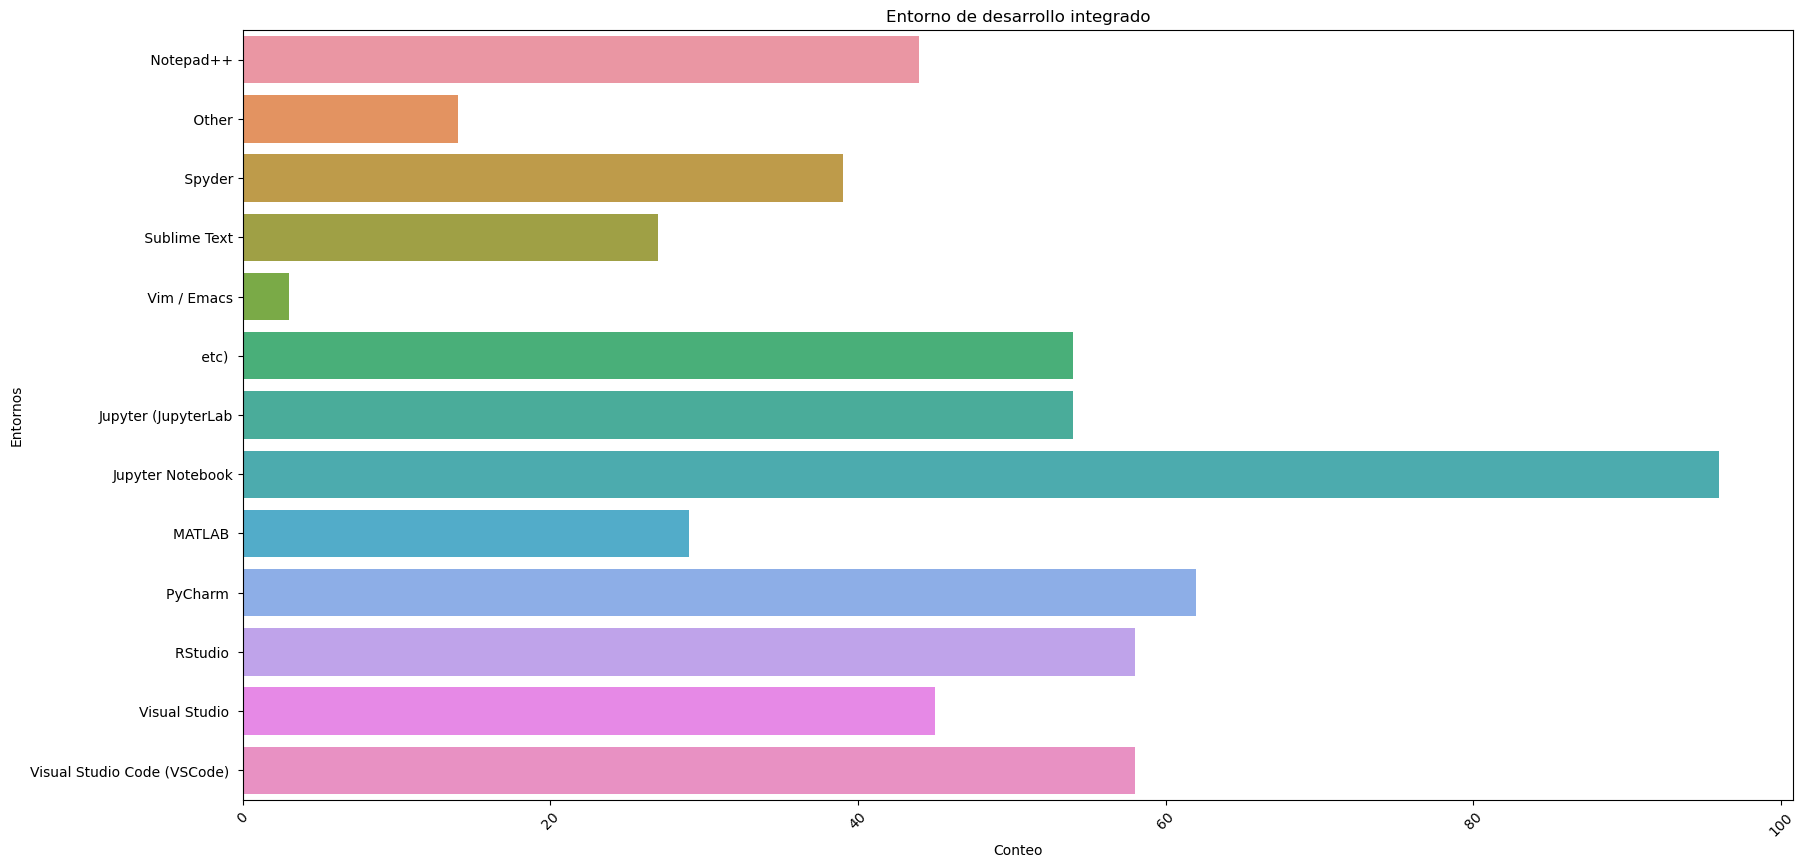

In [ ]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q9', data=df_q9)
plt.title('Entorno de desarrollo integrado')
plt.xticks(rotation = 45)
fig.set(ylabel='Entornos', xlabel= 'Conteo')